> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number ofcharacteristics about the patient are included in each row.



● ‘ScheduledDay’ tells us onwhat day the patient set up theirappointment.


● ‘Neighborhood’ indicates thelocation of the hospital.


● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


● Be careful about the encodingof the last column: it says ‘No’ ifthe patient showed up to theirappointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
● Men or Woman had attended?


● Who are attendance that had received SMS or not?


● How Schoolarship affected to attendance?


●  How Alcoholism affected to attendance?

In [1]:
# Load Libaries that used
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
#Load the data as df
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
#define the shapes
df.shape

(110527, 14)

In [4]:
#define the type of dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#check that data set include any duplicated rows 
df.duplicated().sum()

0

In [6]:
#information about the dateset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#describe some statstics about data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
df = df.rename(columns={'PatientId' : 'patient_id','AppointmentID':'appointment_id', 'Gender': 'gender',
                    'ScheduledDay': 'scheduled_day', 'AppointmentDay' : 'appointment_day', 'Age' : 'age',
                    'Neighbourhood' : 'neighbourhood', 'Scholarship': 'scholarship', 'Hipertension' : 'hipertension', 
                    'Diabetes' : 'diabetes', 'Alcoholism' : 'alcoholism', 'Handcap' : 'handcap', 'SMS_received' : 'sms_received',
                    'No-show' : 'attendance'
                    })

Rename the column to make coding easier

In [9]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Change the type of Scheduled Day and Appointment Day to datetime funcation

In [10]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
def changing_format(name_of_column, type_of_column) : 
    df[name_of_column] = df[name_of_column].astype(type_of_column)
# change some type of data 

In [12]:
changing_format('age', int)
changing_format('attendance', str)
changing_format('gender', str)
changing_format('sms_received', str)
changing_format('scholarship', str)

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
def scholarship_change(scholarship_type ,old_object, new_object) : 
    df[scholarship_type] = df[scholarship_type].replace([old_object], new_object)

In [14]:
scholarship_change('scholarship','0','non registered')
scholarship_change('scholarship','1','registered')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,non registered,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,non registered,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,non registered,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,non registered,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,non registered,1,1,0,0,0,No


In [15]:
def sms_change(sms_type , old_object , new_object) :
    df[sms_type] = df[sms_type].replace([old_object], new_object)

In [16]:
sms_change('sms_received','0','not received')
sms_change('sms_received','1','received')
df.tail(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attendance
110517,5.574942e+12,5780122,F,2016-06-07 07:38:34+00:00,2016-06-07 00:00:00+00:00,19,MARIA ORTIZ,non registered,0,0,0,0,not received,No
110518,7.263315e+13,5630375,F,2016-04-27 15:15:06+00:00,2016-06-07 00:00:00+00:00,50,MARIA ORTIZ,non registered,0,0,0,0,received,No
110519,6.542388e+13,5630447,F,2016-04-27 15:23:14+00:00,2016-06-07 00:00:00+00:00,22,MARIA ORTIZ,non registered,0,0,0,0,received,No
110520,9.969977e+14,5650534,F,2016-05-03 07:51:47+00:00,2016-06-07 00:00:00+00:00,42,MARIA ORTIZ,non registered,0,0,0,0,received,No
110521,3.635534e+13,5651072,F,2016-05-03 08:23:40+00:00,2016-06-07 00:00:00+00:00,53,MARIA ORTIZ,non registered,0,0,0,0,received,No
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,non registered,0,0,0,0,received,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,non registered,0,0,0,0,received,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,non registered,0,0,0,0,received,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,non registered,0,0,0,0,received,No
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,non registered,0,0,0,0,received,No


In [17]:
def replace_attendace(attendace_type , old_object , new_object) :
    df[attendace_type] = df[attendace_type].replace([old_object], new_object)

In [18]:
# change Yes and No with show and no show
replace_attendace('attendance', 'No', 'show')
replace_attendace('attendance', 'Yes','no show' )
df.head(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attendance
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,non registered,1,0,0,0,not received,show
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,non registered,0,0,0,0,not received,show
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,non registered,0,0,0,0,not received,show
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,non registered,0,0,0,0,not received,show
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,non registered,1,1,0,0,not received,show
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,non registered,1,0,0,0,not received,show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,non registered,0,0,0,0,not received,no show
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,non registered,0,0,0,0,not received,no show
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,non registered,0,0,0,0,not received,show
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,non registered,0,0,0,0,not received,show


We found in age row that the min age is -1 and that wrong in data 

In [19]:
#to locate the cell that include age -1
cell=df.query('age == -1')
cell

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,attendance
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,non registered,0,0,0,0,not received,show


We Found that dataset had 1 row only had same age -1 and we will drop it beacuse this row will not affected on the data set 

In [20]:
#remove the value -1 from dataset 
df.drop(index = 99832,inplace=True )
df.describe()

,patient_id,appointment_id,age,hipertension,diabetes,alcoholism,handcap
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.197248,0.071865,0.030400,0.022248
std,2.560943e+14,7.129544e+04,23.110026,0.397923,0.258266,0.171686,0.161543
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,4.000000


Minimum satstics had changed to 0

In [21]:
#Drop unnecssary coloumns 
df.drop(['neighbourhood', 'appointment_day' ,'patient_id','appointment_id' ], axis = 1 , inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis





array([[<AxesSubplot:title={'center':'scheduled_day'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hipertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handcap'}>]], dtype=object)

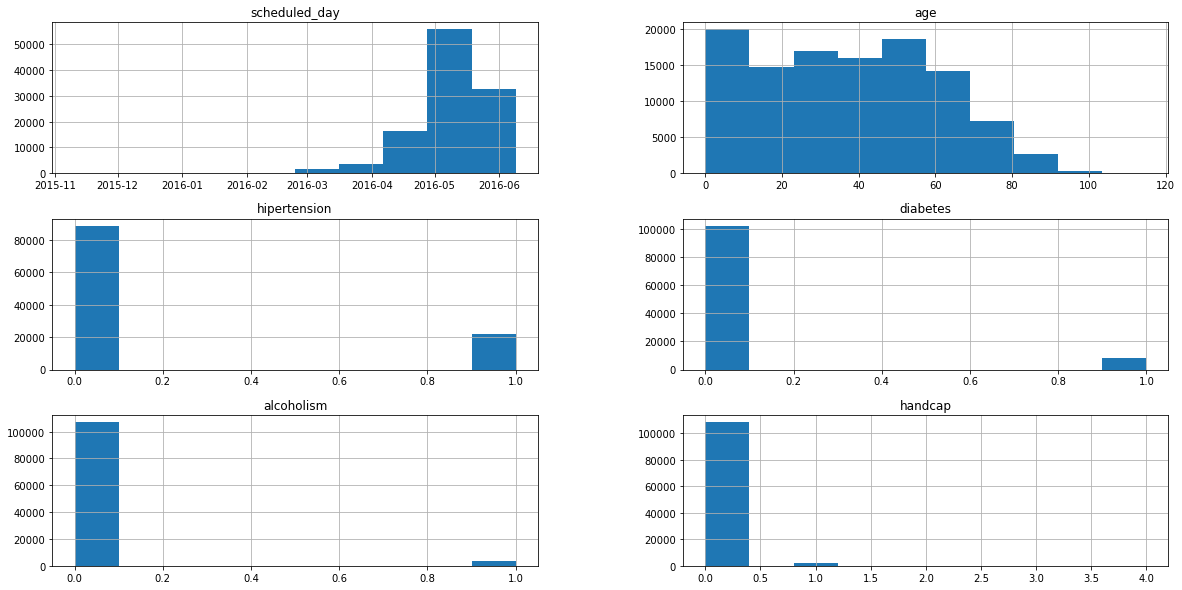

In [22]:
#to explore all data by histogram
df.hist(figsize=(20,10))

### Research Question 1 (Men or Woman had attended?)

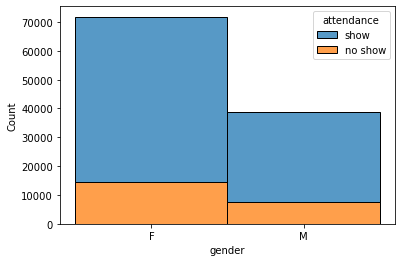

In [23]:
sns.histplot(data=df, x="gender", hue="attendance", multiple="stack");


We found that Female had attended more than Male that the female is show more than 50000  and Male is show approximtly 30000 so Female is better attendance

### Research Question 2  (Who are attendance that had received SMS or not?)

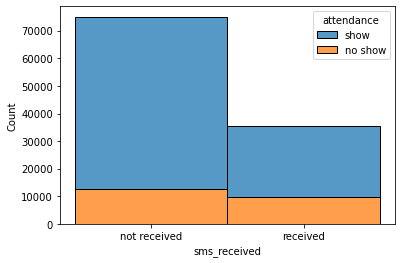

In [24]:
sns.histplot(data=df, x="sms_received", hue="attendance", multiple="stack");


We found that the most attendance that not recived SMS

# Research Question 3 : How Schoolarship affected to attendance?

In [25]:
def sum_group(group):
    x = df.groupby([group,'attendance'])['attendance'].count()
    return x

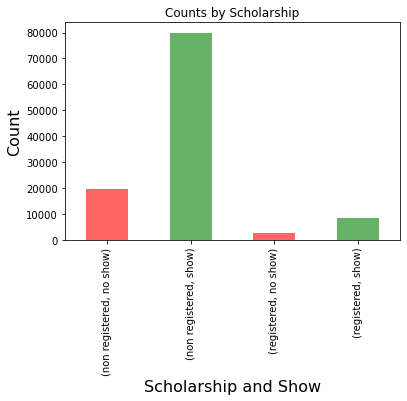

In [26]:
count_scholarship = sum_group('scholarship')
count_scholarship.plot(kind='bar',title='Counts by Scholarship', color=['red', 'green', 'red', 'green'], alpha=.6)
plt.xlabel('Scholarship and Show', fontsize=16)
plt.ylabel('Count', fontsize=16);

We found that people that not registered are attendance more than had registered

## Research Question 4 : How Alcoholism affected to attendance?

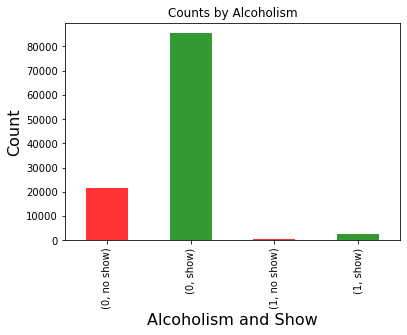

In [27]:
count_alcohol = sum_group('alcoholism')
count_alcohol.plot(kind='bar',title='Counts by Alcoholism', color=['red', 'green', 'red', 'green'], alpha=.8)
plt.xlabel('Alcoholism and Show', fontsize=16)
plt.ylabel('Count', fontsize=16);

We found that the rate of patient dont have Alcoholism is greater than that patient have

<a id='conclusions'></a>
## Conclusions

● SMS not afftected the attendance


● Female had attendace than Male 


● The patient that had not registered ni schoolarship had attendance more than non registered


● We Found that the bigger rate of patient dont have alcholism


● We Found that the most attendance is in May


● the strongly attendance age from 0 to 10


### Limitations
the difference  between scheduled day and appointment day at the percentage of showing up of patients for their appointment.


In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1